# [Игнац Филипп Земмельвейс](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BC%D0%B5%D0%BB%D1%8C%D0%B2%D0%B5%D0%B9%D1%81,_%D0%98%D0%B3%D0%BD%D0%B0%D1%86_%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF)
На основе данных докажем, что этот человек – герой

In [1]:
import pandas as pd
import seaborn as sns

Изучив эти данные, доктор Земмельвейс начал подозревать, что "что-то не так"

In [2]:
# что вы можете сказать по этим данным?
death_rates = pd.read_csv('death_rates_before.csv')
death_rates

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
# посчитаем смертность для каждой больницы
death_rates['death_rate'] = death_rates.deaths / death_rates.births
death_rates

,year,births,deaths,clinic,death_rate
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


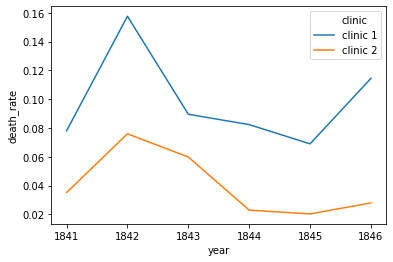

In [4]:
# визуализируем смертность. Ваши гипотезы?
import seaborn as sns
sns.lineplot(x='year', y='death_rate', hue='clinic', data=death_rates)

Желая проверить распространённую в то время теорию, что родильную горячку вызывает эмоциональное потрясение у роженицы, Земмельвейс решил провести эксперимент — он пригласил священника, который каждый день с колоколом обходил палаты и соборовал умирающих. Лежащие на соседних койках женщины были в ужасе, однако на смертность это никак не повлияло.

К сожалению, числовых данных об этом эксперименте не сохранилось.

Но доктор все же сделал то, что привело к реальному изменению ситуации.

In [5]:
# помесячные данные о смертности в проблемной больнице
death_rates_after = pd.read_csv('death_rates_after.csv', parse_dates=['date'])
death_rates_after

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [6]:
# посчитаем смертность
death_rates_after['death_rate'] = death_rates_after.deaths / death_rates_after.births
death_rates_after

,date,births,deaths,death_rate
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


C:\Programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


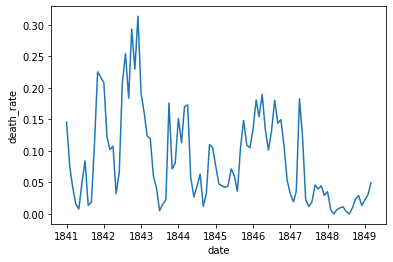

In [7]:
# визуализируем смертность. Когда были введены изменения?
sns.lineplot(x='date', y='death_rate', data=death_rates_after)

In [8]:
important_date = pd.to_datetime('1847-06-01')
death_rates_after['important_date'] = death_rates_after.date.map(lambda x: 'before' if x < important_date else 'after')
death_rates_after

,date,births,deaths,death_rate,important_date
0,1841-01-01,254,37,0.145669,before
1,1841-02-01,239,18,0.075314,before
2,1841-03-01,277,12,0.043321,before
3,1841-04-01,255,4,0.015686,before
4,1841-05-01,255,2,0.007843,before
...,...,...,...,...,...
93,1848-11-01,310,9,0.029032,after
94,1848-12-01,373,5,0.013405,after
95,1849-01-01,403,9,0.022333,after
96,1849-02-01,389,12,0.030848,after


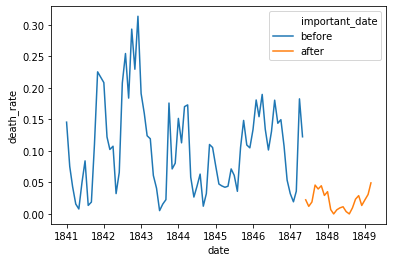

In [9]:
# отделим "до" от "после"
sns.lineplot(x='date', y='death_rate', hue='important_date', data=death_rates_after)

In [10]:
# на какой процент смертность стала в среднем меньше?

# как проверить, что это не случайность?
by_event = death_rates_after.groupby('important_date').mean().death_rate
difference = by_event.after - by_event.before
difference

-0.0839566075118334

In [11]:
# генерируем как можно больше разниц показателей "до" и "после", случайно их выбирая
# https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
means = []
for i in range(3000):
    before = death_rates_after.query('important_date == "before"').sample(frac=1, replace=True).death_rate.mean()
    after = death_rates_after.query('important_date == "after"').sample(frac=1, replace=True).death_rate.mean()
    means.append(after - before)

means

[-0.08925932197341555,
 -0.07628747168921095,
 -0.08626385810041896,
 -0.08278061401923029,
 -0.06604938394275758,
 -0.08414056596070461,
 -0.08206682010833774,
 -0.08809410132384735,
 -0.07680069267138241,
 -0.08305304932178202,
 -0.09096357182176501,
 -0.08290244077379812,
 -0.09052880177041805,
 -0.08068602793906973,
 -0.07727538144195764,
 -0.09836985005772478,
 -0.08450112375668348,
 -0.08070740238976858,
 -0.08501450370088372,
 -0.09293332312355987,
 -0.08110134433315562,
 -0.1025094792663942,
 -0.08101887177441412,
 -0.09236730361731187,
 -0.07516608614437349,
 -0.0837289675514267,
 -0.06984056330150586,
 -0.06931208158508699,
 -0.08425951881203647,
 -0.10088656618793297,
 -0.07889833219049246,
 -0.07627538364450101,
 -0.08558611233304543,
 -0.08132049804734386,
 -0.07763725321089666,
 -0.08370363236444055,
 -0.08603508725260879,
 -0.08991164098653769,
 -0.07429007178252794,
 -0.0798540231333948,
 -0.07545673298869185,
 -0.08360589128314865,
 -0.09116119252065147,
 -0.0981816732

In [12]:
# определяем 95% доверительный интервал
confidence_interval = pd.Series(means).quantile([0.025, 0.975])
confidence_interval

# какой должен быть доверительный интервал, чтобы мы отвергли гипотезу о том, что это не случайность

0.025   -0.101710
0.975   -0.066996
dtype: float64